# Data Exploration



Take some time exploring the data set and report what you find. Feel free to express your findings in any way you think is helpful. It may also be useful to read through Section 2 to find out what features of the data may be important.

In [27]:
# import libraries and csv file

import pandas as pd
import numpy as np
import math
import time

data = pd.read_csv('data.csv')
data.head()

,class,value,distance,special
0,R,2024.01,2585,False
1,R,1931.33,2106,False
2,V,1709.99,3280,False
3,R,3406.64,2082,False
4,R,1189.01,2464,False


In [28]:
# rename class column so functions do not conflict with default class function

data.rename(columns = {'class':'truck_type'}, inplace = True)

In [29]:
# rename truck_types so charts and graphs are easier to understand

data.truck_type.replace('R', 'Reefer', inplace=True)
data.truck_type.replace('F', 'Flatbed', inplace=True)
data.truck_type.replace('V', 'Van', inplace=True)

# Data Exploration

In [30]:
# see ratios of non-numeric fields

print(data.special.value_counts())
print(data.truck_type.value_counts())


False    965
True      35
Name: special, dtype: int64
Reefer     403
Van        390
Flatbed    207
Name: truck_type, dtype: int64


In [31]:
# get percentages for each truck_type

truck_type_counts = data.truck_type.value_counts()

reefer_percent = round(truck_type_counts['Reefer'] / data.shape[0], 2)
van_percent = round(truck_type_counts['Van'] / data.shape[0], 2)
flatbed_percent = round(truck_type_counts['Flatbed'] / data.shape[0], 2)

print(reefer_percent)
print(van_percent)
print(flatbed_percent)
print(reefer_percent+van_percent+flatbed_percent)

0.4
0.39
0.21
1.0


Comments:

- special truck types are not common.

- the truck_types are relatively mixed.

<AxesSubplot:xlabel='distance', ylabel='value'>

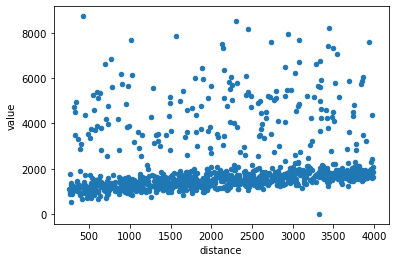

In [32]:
# see correlation between distance and value

data.plot.scatter(x='distance', y='value')

Comments:

- there is a clear trend between distance vs value for most loads
- there are value outliers present for any distance

Open Question:
- what is the source of outlier value loads

Next steps: 
- See if any fields correlate to the higher values

<AxesSubplot:xlabel='distance', ylabel='value'>

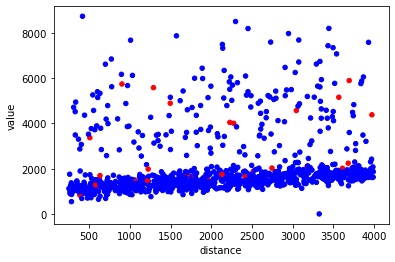

In [33]:
# see if special truck loads affect cost

colors = ['r' if special==True else 'b' for special in data.special]

data.plot.scatter(x='distance', y='value', color=colors)

Comments:

- not much of correlation between special truck loads and value/distance

Next steps:
- try truck type

<AxesSubplot:xlabel='distance', ylabel='value'>

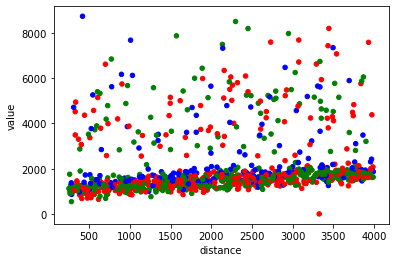

In [34]:
# see correlation between distance and value

colors = ['g' if truck_type=='Reefer' else 'r' if truck_type=='Van' else 'b' for truck_type in data.truck_type]

data.plot.scatter(x='distance', y='value', color=colors)

Conclusion:
- outlier values for distances is not distinguishable 


Next steps:

- review distribution of features by truck_type

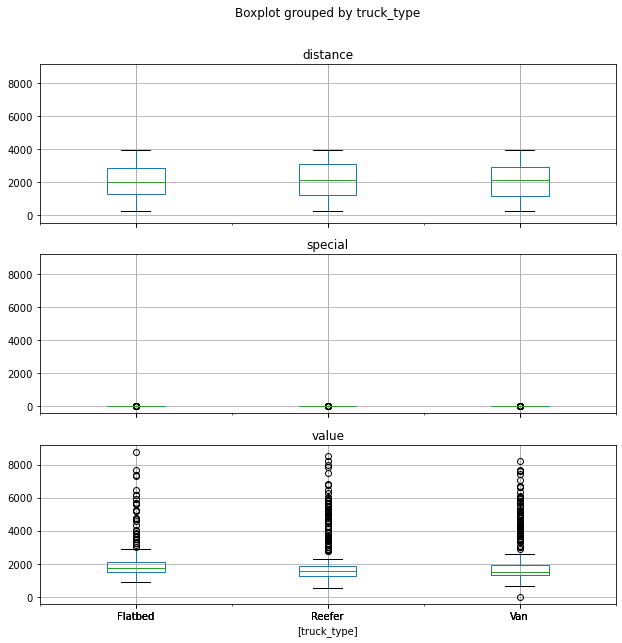

In [35]:
boxplot = data.boxplot(by='truck_type', figsize=(10,10), layout=(3, 1))


Comments:

- Flatbed trucks are more expensive than Reefer and Van loads
- All 3 truck types are used evenly for all distances 

# Partition Algorithm

Function 1 - Baseline

- Start by writing a very simple algorithm to partition the data. This will act as your baseline for comparing your next one(s). This simple algorithm does not need to satisfy every constraint well (or at all!) but should at least produce the correct number of partitions, and include some randomization.

Requirements:
1. The user can decide to use any number of partitions, from 1, up to the size of the dataset
itself
2. No row should ever be duplicated, modified, or left out. Each row should appear in
exactly one partition.
3. Each partition should have as close to the same number of rows as each other
4. Each partition should have as close to the same number of rows from each category of
shipment, R, V, and F
5. The sum of the “value” column for each partition should be approximately the same
6. The sum of the “value” column for each class (R, V, F) in each partition should be
approximately the same.
7. Partitions should be randomized, so that repeated partitioning tasks would not
necessarily produce the same result each time.

Before we dive into the algorithm, lets define the metrics to classify a "successful algorithm":

In [36]:
#  1 & 2 - No row should ever be duplicated, modified, or left out. Each row should appear in 
#  exactly one partition.
#     - if the there are no duplicates and each partition length sums to the initial dataset 
#       length, then this entire requirement is met
#     - ie : just check if any loads are duplicated in each partition


# 3 - Each partition should have as close to the same number of rows as each other
#     - ie : just compare len(partitions[i])
    
    
# 4 - Each partition should have as close to the same number of rows from each category of shipment, R, V, and F
#     --> len(partitions[partitions[i] == truck_type]) for all 3 truck types


# 5 - The sum of the “value” column for each partition should be approximately the same
#     --> partitions['value'].sum() for all partitions
    
    
# 6 -  The sum of the “value” column for each class (R, V, F) in each partition should be approximately the same.
#     --> partitions[partitions[i] == truck_type]['value'].sum()


# 7 - Partitions should be randomized, so that repeated partitioning tasks would not necessarily produce the same result each time.
#     --> use random_integer input

In [37]:
data.head(10)

,truck_type,value,distance,special
0,Reefer,2024.01,2585,False
1,Reefer,1931.33,2106,False
2,Van,1709.99,3280,False
3,Reefer,3406.64,2082,False
4,Reefer,1189.01,2464,False
5,Van,1468.45,2234,False
6,Van,1355.33,3141,False
7,Van,1649.94,1786,True
8,Flatbed,2037.55,3375,False
9,Reefer,1874.20,3595,False


In [38]:
# algorithm input --> input of number ranging from 1-1000 and random_state

def partitionFunction1(partitions, random_state):
    
    # copy data into another dataframe so function can be called multiple times
    iterable_data_set = data.copy()
    
    # 1 - define partition size
    partition_size = iterable_data_set.shape[0] / partitions
    remainder = abs(partition_size - round(partition_size, 0))
    
    # 2 - sample from each truck type dataframe (same percent from each truck type)
    # 2a - initialize dictionary to store partitioned datasets
    partitioned_datasets = {}
    
    # initialize remaining average loads per partition after pulling from initial dataset
    running_average = 0
    
    
    
    
    # even paritions algorithm
    if (partition_size % 2 == 0):
        for i in range(partitions):

            partitioned_datasets[i] = iterable_data_set.sample(n=int(partition_size))
            sample_index_list = partitioned_datasets[i].index.tolist()
            iterable_data_set.drop(sample_index_list, axis=0, inplace=True)
    
    
    
    # uneven paritions algorithm
    if (partition_size % 2 != 0):
        
        for g in range(partitions):
            
            running_average = len(iterable_data_set) / (partitions - g)
            
            if g == (partitions - 1):
                partitioned_datasets[g] = iterable_data_set

            elif (running_average > partition_size):
                partitioned_datasets[g] = iterable_data_set.sample(n=int(partition_size + 1))
                sample_index_list = partitioned_datasets[g].index.tolist()
                iterable_data_set.drop(sample_index_list, axis=0, inplace=True)

            else:
                partitioned_datasets[g] = iterable_data_set.sample(n=int(partition_size))
                sample_index_list = partitioned_datasets[g].index.tolist()
                iterable_data_set.drop(sample_index_list, axis=0, inplace=True)
          
        
    return partitioned_datasets
            


# Algorithm Test Function

In [54]:
# report on algorithm metrics
    
def AlgorithmResults(num_of_partitions, random_state_integer):
    
    before_algorithm = time.time()
    
    partitioned_datasets = partitionFunction1(num_of_partitions, random_state_integer)
    
    after_algorithm = time.time()
    
    
    before_test = time.time()
    
    # initilize a dataframe for test function results to be displayed
    columns = ['Load Count', 
               'Duplicates', 
               'Reefer Count',
               'Van Count',
               'Flatbed Count',
               'Sum of Values',
               'Sum of Reefer Values',
               'Sum of Van Values',
               'Sum of Flatbed Values',
              ]

    index = range(0, len(partitioned_datasets))

    test_results = pd.DataFrame(columns=columns, index=index)
    
    # initialize list to store index arrays for duplication check
    index_list = []

    # loop thru partitions to extract index lists and add them into one
    for i in range(len(partitioned_datasets)):
        
        # get index list of each partition
        test_results.iloc[i, 0] = len(partitioned_datasets[i])
        
        # get duplicates in each partition
        duplicates = [number for number in (partitioned_datasets[i].index.tolist()) if (partitioned_datasets[i].index.tolist()).count(number) > 1]
        test_results.iloc[i, 1] = len(duplicates)
        
        # get count of each truck type in each partition
        unique_truck_types = list(partitioned_datasets[i]['truck_type'].unique())
        
        # initialize dictionary to tie truck type to test_results location
        type_to_location = {'Reefer':2, 'Van':3, 'Flatbed':4}
        
        # add truck type counts to test_results
        for g in unique_truck_types:
            test_results.iloc[i, type_to_location[g]] = partitioned_datasets[i]['truck_type'].value_counts()[g] 
        # fill NaN with 0
        test_results['Reefer Count'].fillna(0, inplace=True)
        test_results['Van Count'].fillna(0, inplace=True)
        test_results['Flatbed Count'].fillna(0, inplace=True)
        
        
        # get sum of partition value column
        test_results.iloc[i, 5] = partitioned_datasets[i]['value'].sum()
                
        # get sum of partition value column for per truck types
        reefer_partition = partitioned_datasets[i][partitioned_datasets[i]['truck_type'] == 'Reefer']
        van_partition = partitioned_datasets[i][partitioned_datasets[i]['truck_type'] == 'Van']
        flatbed_partition = partitioned_datasets[i][partitioned_datasets[i]['truck_type'] == 'Flatbed']
        
        # add values to test_results
        test_results.iloc[i, 6] = reefer_partition['value'].sum()
        test_results.iloc[i, 7] = van_partition['value'].sum()
        test_results.iloc[i, 8] = flatbed_partition['value'].sum()
        
        # add index's to one list
        index_list += partitioned_datasets[i].index.tolist()
        
        final_results = test_results.T
        
        # output summary statistics for each parition
        # final_results['Standard Deviation'] = round(final_results.std(axis=1), 0)
        final_results['Sum'] = round(final_results.sum(axis=1), 0)
        
    after_test = time.time()
    
    test_time = (after_test-before_test)*1000
    algorithm_time = (after_algorithm-before_algorithm)*1000
    
    print('Test function took ' + str(test_time) + 'ms')
    print('Algorithm took ' + str(algorithm_time) + 'ms')
    
    return final_results
    
    

In [56]:
AlgorithmResults(999, 1)

Test function took 54422.207832336426ms
Algorithm took 844.8729515075684ms


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,Sum
Load Count,1,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1000.0
Duplicates,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Reefer Count,1,1,0,1,1,0,0,0,0,0,...,0,0,1,1,0,1,1,0,1,403.0
Van Count,0,1,0,0,0,0,1,1,1,0,...,0,1,0,0,1,0,0,0,0,390.0
Flatbed Count,0,0,1,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,207.0
Sum of Values,1305.96,2942.63,2085.88,1738.86,541.79,5613.78,1179.16,1095.73,1340.18,1431.24,...,3962.39,1221.01,1134.23,3655.66,1791.05,1583.02,1311.18,1887.03,1896.45,2070839.0
Sum of Reefer Values,1305.96,1653.55,0.0,1738.86,541.79,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1134.23,3655.66,0.0,1583.02,1311.18,0.0,1896.45,809203.0
Sum of Van Values,0.0,1289.08,0.0,0.0,0.0,0.0,1179.16,1095.73,1340.18,0.0,...,0.0,1221.01,0.0,0.0,1791.05,0.0,0.0,0.0,0.0,803045.0
Sum of Flatbed Values,0.0,0.0,2085.88,0.0,0.0,5613.78,0.0,0.0,0.0,1431.24,...,3962.39,0.0,0.0,0.0,0.0,0.0,0.0,1887.03,0.0,458591.0


Questions:
1. Describe how this algorithm works.


2. What do the results look like when partitioning the data set?

# Function 2 - Improving the Algorithm

Now write another algorithm that you think will improve the results on at least one of the
constraints.

In [ ]:

# partition_size = data.shape[0] / 5


# # get value sum target for each truck_type ie size of each truck type + equivalent avg sum value

# # number of loads of each truck type per partition
# flatbed_partition_size = partition_size * flatbed_percent
# van_partition_size = partition_size * van_percent
# reefer_partition_size = partition_size * reefer_percent

# # equivalent target for sum of values
# flatbed_partition_target_sum_value = flatbed_partition_size * avg_load_value
# van_partition_target_sum_value = van_partition_size * avg_load_value
# reefer_partition_target_sum_value = reefer_partition_size * avg_load_value



# # for loop start : 

# # sample from each truck_type until average_partition_value is reached

# flatbed_sample = flatbed.sample(n=int(flatbed_partition_size))
# van_sample = van.sample(n=int(van_partition_size))
# reefer_sample = reefer.sample(n=int(reefer_partition_size))


# # define new dataframe to add loads to and add index 0
# new_flatbed_partition = pd.DataFrame();
# new_flatbed_partition.append(flatbed_sample.iloc[0])
# # drop that load from dataset

# # define current value
# current_value = flatbed_sample['value'].iloc[i]

# # drop

In [ ]:
# # for loop for each truck_type dataset

# # add search thru truck_type datasets and add loads based on current_value
# for i in len(flatbed_partition_size)():    
    
#     # define target
#     current_target = avg_load_value * (i + 1)
    
#     # define current value sum
#     current_value = 0
    
#     # if load[i] > current_target : find load < previous load
#     # add value to current_value
#     for g in len(flatbed_partition_size)():
#         if new_flatbed_partition[i] >= current_target:
#             # add load with value less than current_target
#             new_flatbed_partition.append(flatbed_partition_size[i])
#             # add load value to current_value
#             current_value += flatbed_partition_size['value'][i]
#             # drop load from dataset
#             ????
            
#             else:
#                 # add load with value less than current_target
#                 new_flatbed_partition.append(flatbed_partition_size[i])
#                 # add load value to current_value
#                 current_value += flatbed_partition_size['value'][i]
#                 # drop load from dataset
#                 ????
            
    
    
#     # if load[i] < current_target : find load > previous load
#     # add value to current_value


# # remove samples from initial dataset
# # data.drop(flatbed_sample.index, axis=0, inplace=True)